In [1]:
%matplotlib widget

import sys  
sys.path.insert(0, '/home/cbisot/pycode/MscThesis/')
from pymatreader import read_mat
from scipy import sparse
import numpy as np
import os
from datetime import datetime, timedelta
import pandas
import cv2
import json
import pandas as pd
from amftrack.pipeline.paths.directory import *
from amftrack.util import *
import pickle
from joblib import Parallel, delayed
from datetime import datetime
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.post_processing.global_plate import *
from amftrack.pipeline.functions.post_processing.global_hypha import *
from amftrack.pipeline.functions.post_processing.time_hypha import *
from amftrack.pipeline.functions.post_processing.time_plate import *

In [2]:
directory = directory_project
update_analysis_info(directory)
analysis_info = get_analysis_info(directory)

In [3]:
select = analysis_info.loc[analysis_info['Plate']!=22]

In [22]:
select = analysis_info.loc[analysis_info['Plate']==91]

In [9]:
plates = set(select_v7['Plate'].values)
plates
selection = []
for plate in plates:
    select_folder = np.min(select_v7.loc[(select_v7['Plate']==plate)]['folder_analysis'])
    selection.append(select_folder)
select = select_v7.loc[(select_v7['folder_analysis'].isin(selection))]

In [8]:
from shutil import copyfile
for index,row in select.iterrows():
    plate = row['Plate']
    folder_target = row['folder_analysis']
    if len(select.loc[select['Plate']==plate]['folder_analysis'])>0:
        folder_origin = select.loc[select['Plate']==plate]['folder_analysis'].values[0]
        src = f'{directory_project}{folder_origin}/orthog.npy'
        dst = f'{directory_project}{folder_target}/orthog.npy'
        if os.path.isfile(src):
            print(dst)
            # copyfile(src, dst)
        else:
            print(plate)

/projects/0/einf914/data/Analysis_1636046826216022929_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_1636107306199118080_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_1636104897672902830_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_1636044918401523795_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_1636043977602188694_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_1636044998117269036_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_1636046622780809853_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_1636044946127011963_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_1636044849869238592_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_1636047796407701153_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_1636052342408187814_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_1636045159591685376_0_100_Version9/orthog.npy
/projects/0/einf914/data/Analysis_163604

In [6]:
time = '10:00'
directory = directory_project
list_f = [num_hypha,prop_lost_tracks_junction,prop_lost_tracks_tips,prop_lost_tracks_junction,prop_lost_tracks_tips,prop_inconsistent_root,number_of_timepoints_withing_boundaries,number_of_timepoints]
list_args= [None,[1],[1],[10],[10]]+[[]]*len(list_f)
overwrite = True
num_parallel = 5
run_parallel_post('global_plate_post_process.py', list_f,list_args,[directory,overwrite],select, num_parallel, time,'global_plate_post_process',cpus = 128,name_job = 'glob_plate')

Submitted batch job 105747
Submitted batch job 105748
Submitted batch job 105749
Submitted batch job 105750


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


In [4]:
frames = []
for index, row in select.iterrows():
    ser = pd.read_json(f'{directory}{row["path_global_plate_info"]}',convert_dates=True,typ='series')
    frame = ser.to_frame(index).transpose()
    frames.append(frame)
global_plate_infos = pd.concat(frames)
global_plate_infos

,Plate,version,PrincePos,root,strain,medium,split,Temp,CrossDate,Pbait,...,date_end,number_timepoints,path_exp,num_hypha,prop_lost_track_junction_lape1,prop_lost_track_tips_lape1,prop_lost_track_junction_lape10,prop_lost_track_tips_lape10,inconsist_root,num_timepoint_within
0,799,Version9,39,Carrot,A5,001P100N,Y,None,20211001,-,...,20211011_1227_Plate39,95,Analysis_1636046826216022929_0_100_Version9/ex...,2332,0.106478,0.0646428,0.267057,0.249744,0.0192967,15
1,790,Version9,23,Carrot,A5,001P100N,Y,None,20210907,-,...,20210917_1325_Plate23,96,Analysis_1636107306199118080_0_100_Version9/ex...,11638,0.0995398,0.0641223,0.353597,0.311277,0.0180443,12
2,800,Version9,31,Carrot,A5,001P100N,Y,None,20210928,-,...,20211011_1408_Plate31,91,Analysis_1636104897672902830_0_100_Version9/ex...,8513,0.0928036,0.0422134,0.304817,0.173528,0.0186773,5
4,80,Version9,36,Carrot,A5,001P100N,Y,None,20201127,-,...,20201206_2113_Plate36,47,Analysis_1636044918401523795_0_100_Version9/ex...,1269,0.137829,0.0515597,0.348672,0.225776,0.0267928,15
5,10,Version9,36,Carrot,A5,001P100N,Y,None,20210107,-,...,20210112_2333_Plate36,31,Analysis_1636043977602188694_0_100_Version9/ex...,216,0.104096,0.0416667,0.256658,0.170732,0.037037,30
6,76,Version9,38,Carrot,A5,001P100N,Y,None,20210108,-,...,20210112_2337_Plate38,25,Analysis_1636044998117269036_0_100_Version9/ex...,3751,0.114181,0.0702071,0.267741,0.290535,0.0146628,16
7,94,Version9,39,Carrot,A5,001P100N,Y,25,20201123,None,...,20201210_1156_Plate39,100,Analysis_1636046622780809853_0_100_Version9/ex...,4199,0.0918711,0.0430891,0.216631,0.174853,0.0166706,80
8,88,Version9,17,Carrot,A5,001P100N,Y,None,20210915,-,...,20211006_0900_Plate17,100,Analysis_1636044946127011963_0_100_Version9/ex...,798,0.136377,0.0526761,0.313642,0.222859,0.0275689,55
9,26,Version9,39,Carrot,A5,001P100N,Y,None,20210104,-,...,20210113_2325_Plate30,44,Analysis_1636044849869238592_0_100_Version9/ex...,3715,0.17744,0.0769615,0.443154,0.328563,0.028533,0
10,808,Version9,35,Carrot,A5,001P100N,Y,None,20210928,-,...,20211011_1415_Plate35,91,Analysis_1636047796407701153_0_100_Version9/ex...,3819,0.0933873,0.0422904,0.277656,0.191808,0.0162346,15


In [7]:
time = '20:00'
directory = directory_project
list_f = [get_length,get_area, get_area_separate_connected_components,get_num_tips,get_num_nodes,get_area_study_zone,get_num_tips_study_zone,get_num_nodes_study_zone,get_length_study_zone,is_out_study]
list_args= [{}]*len(list_f)
overwrite = True
num_parallel = 5
run_parallel_post('time_plate_post_process.py', list_f,list_args,[directory,overwrite],select, num_parallel, time,'time_plate_post_process',cpus = 128,name_job = 'time_plate')

Submitted batch job 105752
Submitted batch job 105753
Submitted batch job 105754
Submitted batch job 105755


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


In [25]:
frames = []
for index, row in select.iterrows():
    if os.path.isfile(f'{directory}{row["path_time_plate_info"]}'):
        frame = pd.read_json(f'{directory}{row["path_time_plate_info"]}',convert_dates=True).transpose()
        frame.index.name = 't'
        frame.reset_index(inplace=True)
        frames.append(frame)
time_plate_infos = pd.concat(frames,ignore_index=True)
time_plate_infos.loc[time_plate_infos['Plate']==91]

,t,tot_length,area,area_sep_comp,num_tips,num_nodes,area_study,num_tips_study,num_nodes_study,tot_length_study,out_study,date,Plate,path_exp,folder_analysis
0,0,8960.65,4.16197,0,4,22,0,1,2,0,0,"17.12.2020, 16:11:",91,Analysis_1636045159591685376_0_100_Version9/ex...,Analysis_1636045159591685376_0_100_Version9
1,1,14260.5,178.908,0,8,58,51.387,5,45,2714.69,0,"18.12.2020, 08:08:",91,Analysis_1636045159591685376_0_100_Version9/ex...,Analysis_1636045159591685376_0_100_Version9
2,2,26549.2,26.9298,0,9,27,0,1,2,0,0,"18.12.2020, 12:07:",91,Analysis_1636045159591685376_0_100_Version9/ex...,Analysis_1636045159591685376_0_100_Version9
3,3,18706.6,193.503,0,9,61,105.751,6,42,2644.49,0,"18.12.2020, 16:06:",91,Analysis_1636045159591685376_0_100_Version9/ex...,Analysis_1636045159591685376_0_100_Version9
4,4,20856.3,198.798,0,12,97,106.456,9,83,3895.06,0,"18.12.2020, 20:06:",91,Analysis_1636045159591685376_0_100_Version9/ex...,Analysis_1636045159591685376_0_100_Version9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1.24539e+06,2098.97,585.668,873,7001,1647.97,695,5834,982418,1,"02.01.2021, 23:29:",91,Analysis_1636045159591685376_0_100_Version9/ex...,Analysis_1636045159591685376_0_100_Version9
96,96,1.32892e+06,2147.94,624.427,965,7456,1699.69,767,6261,1.05111e+06,1,"03.01.2021, 03:29:",91,Analysis_1636045159591685376_0_100_Version9/ex...,Analysis_1636045159591685376_0_100_Version9
97,97,1.40979e+06,2196.19,648.605,1033,7885,1734.58,836,6709,1.14011e+06,1,"03.01.2021, 07:29:",91,Analysis_1636045159591685376_0_100_Version9/ex...,Analysis_1636045159591685376_0_100_Version9
98,98,1.44305e+06,2259.11,682.301,1088,8316,1775.81,889,7108,1.18169e+06,1,"03.01.2021, 11:29:",91,Analysis_1636045159591685376_0_100_Version9/ex...,Analysis_1636045159591685376_0_100_Version9


In [5]:
time = '1:00:00'
directory = directory_project
# list_f = [get_width,get_tot_length_C,get_tot_growth_C]
# list_f = [get_timestep_anastomosis]
# list_f = [get_tot_length_pp,get_tot_growth_pp,get_timestep_stop_growth,get_time_stop_growth,get_time_init_growth,get_mean_speed_growth,get_stop_track,get_timestep_anastomosis,get_timestep_biological_stop_growth]
list_f = [get_num_branch]

list_args= [{}]*len(list_f)
overwrite = False
num_parallel = 5
run_parallel_post('global_hypha_post_process.py', list_f,list_args,[directory,overwrite],select, num_parallel, time,'global_hypha_post_process',cpus = 128,name_job = 'glob_hypha')

Submitted batch job 103023
Submitted batch job 103024
Submitted batch job 103025
Submitted batch job 103026


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


In [4]:
frames = []
for index, row in select.iterrows():
    if os.path.isfile(f'{directory}{row["path_global_hypha_info"]}'):
        frame = pd.read_json(f'{directory}{row["path_global_hypha_info"]}',convert_dates=True).transpose()
        frame.index.name = 'hypha'
        frame.reset_index(inplace=True)
        frames.append(frame)
global_hypha_info = pd.concat(frames,ignore_index=True)
# time_plate_infos.loc[time_plate_infos['Plate']==91]

In [5]:
global_hypha_info

,hypha,av_width_final,tot_length_C,tot_growth_C,Plate,path_exp,folder_analysis,timestep_anastomosis
0,0,8.96476,12773.1,10150.7,799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,62
1,1,6.35393,639.454,465.91,799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,None
2,4,6.73302,4535.87,1013.29,799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,52
3,6,5.76568,515.355,206.62,799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,None
4,13,6.68039,195.975,6.21958,799,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9,None
...,...,...,...,...,...,...,...,...
74437,130687,7.68632,275.476,0,787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,NaN
74438,130752,7.47545,267.096,0,787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,NaN
74439,130787,8.36602,184.512,0,787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,NaN
74440,130810,2.92697,176.539,0,787,Analysis_1636046513186951533_0_23_Version9/exp...,Analysis_1636046513186951533_0_23_Version9,NaN


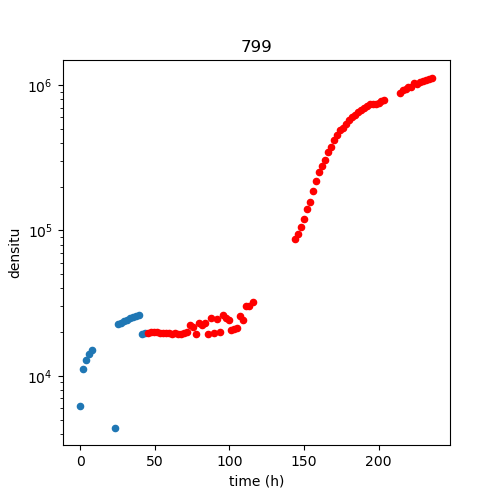

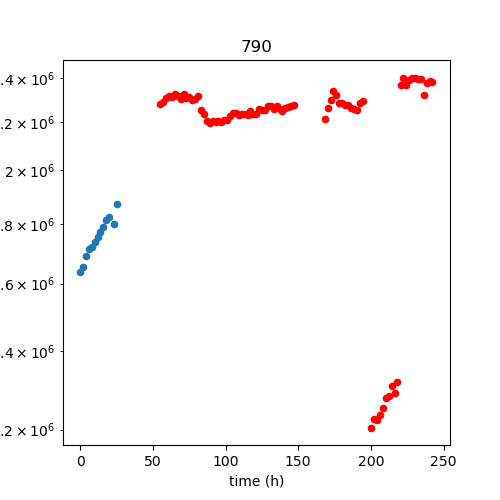

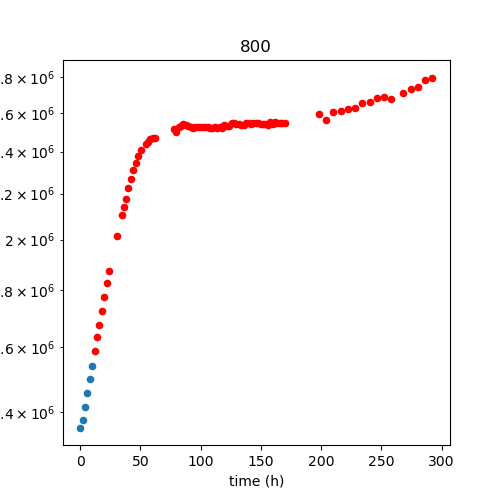

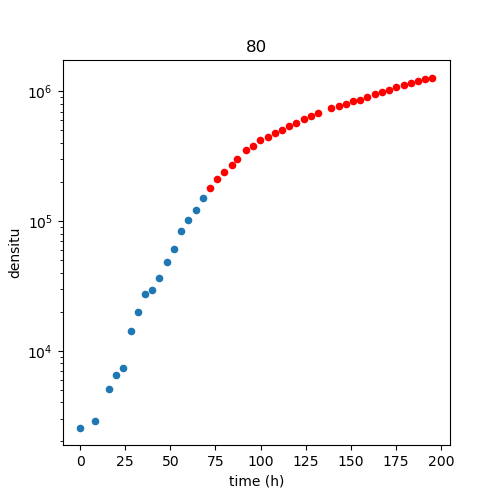

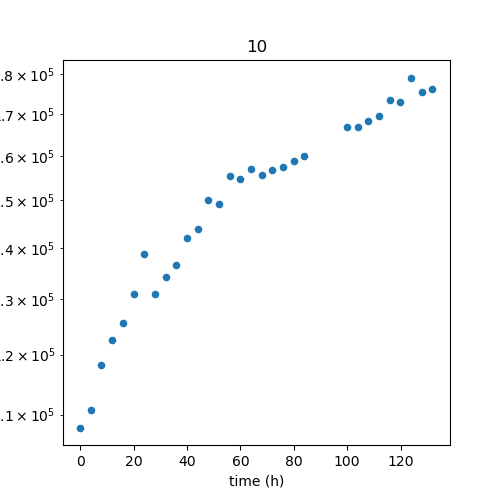

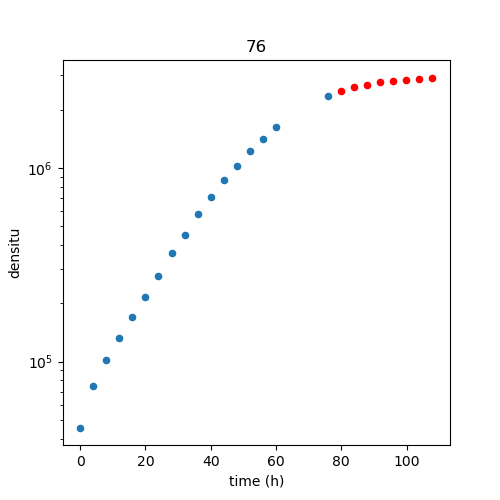

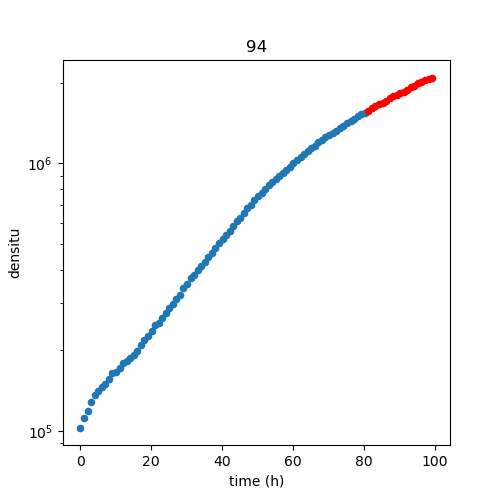

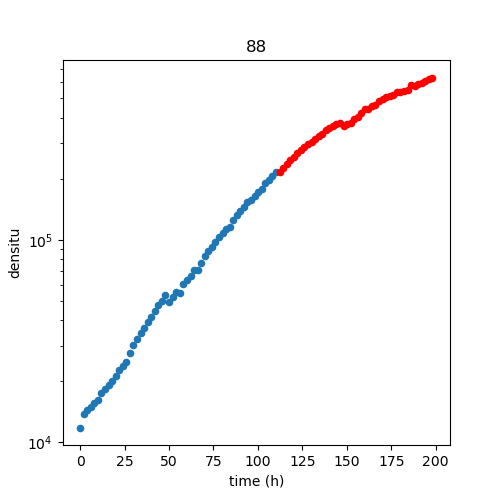

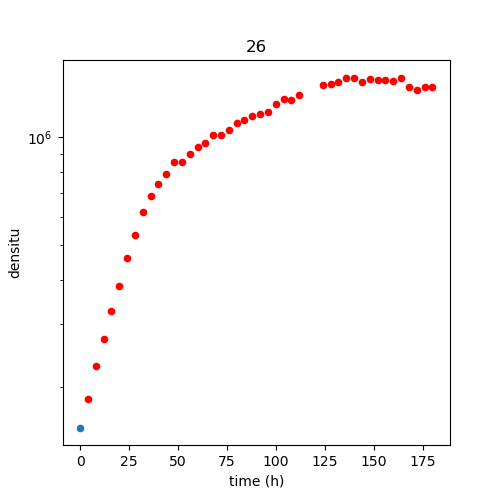

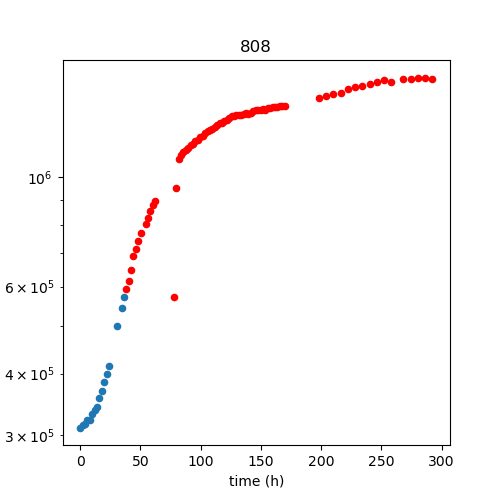

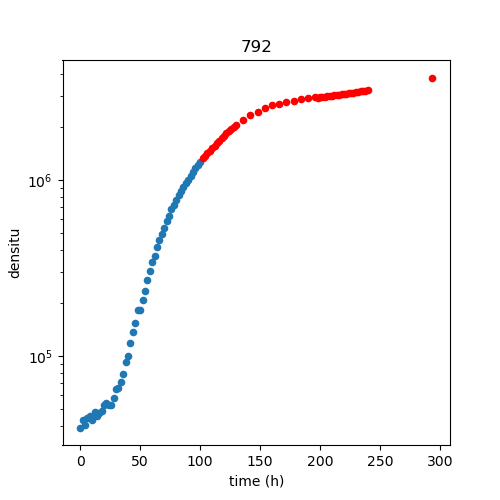

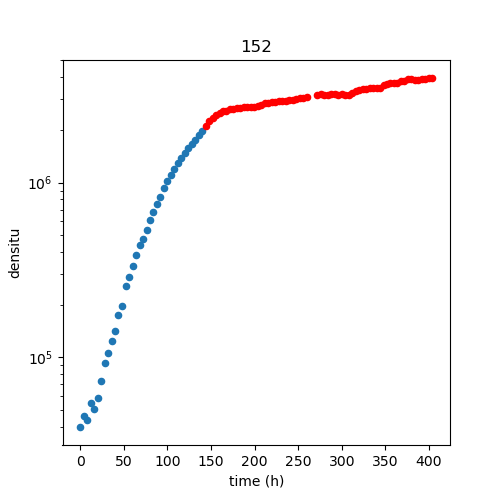

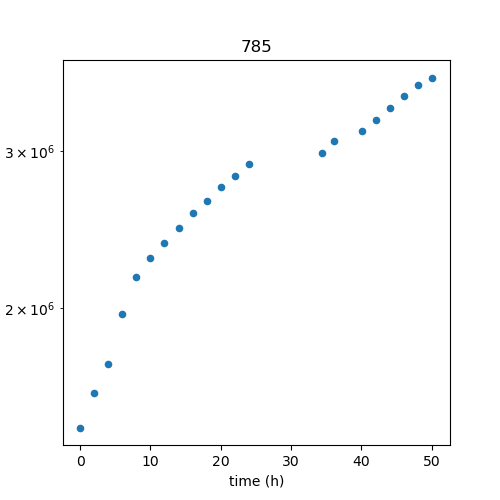

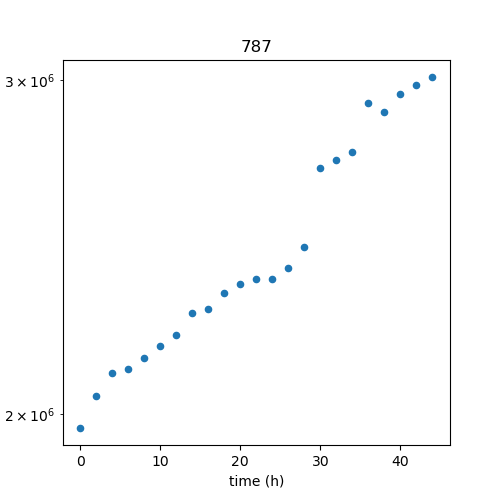

In [14]:
plt.close('all')
x = 'time_since_begin'
y = 'tot_length_study'
xlabel = 'time (h)'
ylabel = 'densitu'
logy = True
logx = False
# ylim = 0,2000
ylim = None
for index, row in select.iterrows():
    plate = row['Plate']
    if os.path.isfile(f'{directory}{row["path_time_plate_info"]}'):
        fig = plt.figure(figsize=(5, 5))
        ax = fig.add_subplot(111)
        whole_plate_info = pd.read_json(f'{directory}{row["path_time_plate_info"]}',convert_dates=True).transpose()
        whole_plate_info.index.name = 't'
        whole_plate_info.reset_index(inplace=True)
        whole_plate_info['datetime'] = pd.to_datetime(whole_plate_info['date'], format="%d.%m.%Y, %H:%M:")
        whole_plate_info['time_since_begin'] = (whole_plate_info['datetime'] - min(whole_plate_info['datetime']))/ np.timedelta64(1, 'h')
        whole_plate_info['density'] = whole_plate_info['tot_length_study']/(whole_plate_info['area_sep_comp']+1)
        in_study = whole_plate_info.loc[whole_plate_info['out_study']==0]
        out_study = whole_plate_info.loc[whole_plate_info['out_study']==1]
        in_study.plot(x,y,'scatter',title = plate,ax=ax,logy = logy,logx = logx,xlabel=xlabel,ylabel=ylabel,ylim = ylim)
        out_study.plot(x,y,'scatter',title = plate,ax=ax,color='red',logx = logx,logy = logy,xlabel=xlabel,ylabel=ylabel,ylim = ylim)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

    

In [ ]:
whole_plate_info.head()

In [ ]:
whole_plate_info['date']

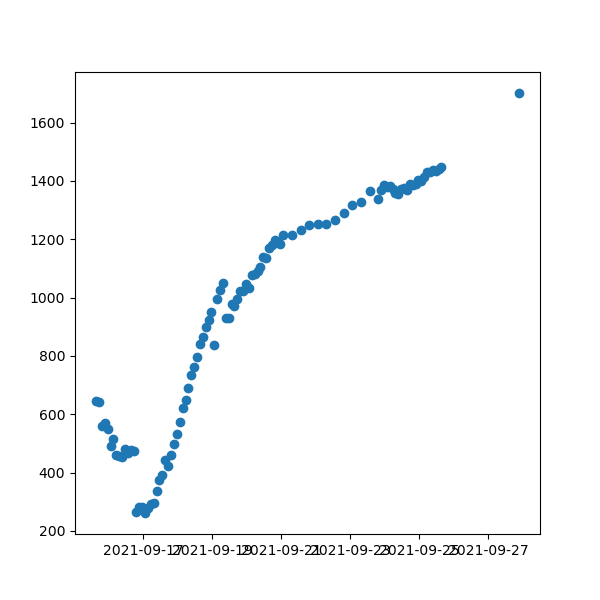

In [12]:
import matplotlib.pyplot as plt
x = whole_plate_info['datetime']
y = whole_plate_info['tot_length_study']/whole_plate_info['area_study']

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.scatter(x,y)

In [14]:
os.path.isfile(f'{directory}{path_time_plate_info}')

False

In [12]:
select

,folder_analysis,version,Plate,PrincePos,root,strain,medium,split,Temp,CrossDate,...,Pbait,date_begin,date_end,number_timepoints,path_exp,path_global_hypha_info,path_time_hypha_info,path_time_plate_info,path_global_plate_info,date_run_analysis
13,Analysis_1636045159591685376_0_100_Version9,Version9,91,37,Carrot,A5,001P100N,Y,None,20201217,...,-,20201217_1611_Plate37,20210105_2338_Plate37,112,Analysis_1636045159591685376_0_100_Version9/ex...,Analysis_1636045159591685376_0_100_Version9/gl...,Analysis_1636045159591685376_0_100_Version9/ti...,Analysis_1636045159591685376_0_100_Version9/ti...,Analysis_1636045159591685376_0_100_Version9/gl...,"01.01.1970, 01:00:"


In [26]:
list_f = [get_time,get_speed,get_time_since_start]
list_args= [{}]*len(list_f)
overwrite = True
num_parallel = 4
time = '10:00'
for index, row in select.iterrows():
    folder = row['folder_analysis']
    path_time_plate_info = row['path_time_plate_info']
    plate = row['Plate']
    num_cpus = 32*min(4,row['number_timepoints']//25)
    if os.path.isfile(f'{directory}{path_time_plate_info}'):
        whole_plate_info = pd.read_json(f'{directory}{path_time_plate_info}',
       convert_dates=True).transpose()
        whole_plate_info.index.name = 't'
        whole_plate_info.reset_index(inplace=True)
        run_parallel_post('time_hypha_post_process.py', list_f,list_args,[directory,overwrite],whole_plate_info, num_parallel, time,'time_hypha_post_process',cpus = num_cpus,name_job='time_hypha')

sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 73704
Submitted batch job 73705
Submitted batch job 73706
Submitted batch job 73707
Submitted batch job 73708
Submitted batch job 73709
Submitted batch job 73710
Submitted batch job 73711
Submitted batch job 73712
Submitted batch job 73713


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a n

Submitted batch job 73714
Submitted batch job 73715
Submitted batch job 73716
Submitted batch job 73717


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 73718
Submitted batch job 73719
Submitted batch job 73720
Submitted batch job 73721
Submitted batch job 73722
Submitted batch job 73723
Submitted batch job 73724
Submitted batch job 73725
Submitted batch job 73726


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


Submitted batch job 73727
Submitted batch job 73728
Submitted batch job 73729


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.


In [7]:
frames = []
for index, row in select.iterrows():
    folder = row['folder_analysis']
    path_time_plate_info = row['path_time_plate_info']
    plate = row['Plate']
    if os.path.isfile(f'{directory}{path_time_plate_info}'):
        time_plate_info = pd.read_json(f'{directory}{path_time_plate_info}',
       convert_dates=True).transpose()
        time_plate_info.index.name = 't'
        time_plate_info.reset_index(inplace=True)
        for indexo, rowt in time_plate_info.iterrows():
            t = rowt['t']
            path_hyph_info_t = f'{directory}{folder}/time_hypha_info/hyph_info_{t}.json'
            if os.path.isfile(path_hyph_info_t):
                hyph_info_t = pd.read_json(path_hyph_info_t,
       convert_dates=True).transpose()
                hyph_info_t['Plate']=rowt['Plate']
                hyph_info_t['folder']=folder
                hyph_info_t['t']=rowt['t']
                frames.append(hyph_info_t)
result = pd.concat(frames)

In [8]:
len(set((result["Plate"].astype(str)+'_'+result["end"].astype(str)).values))

52028

In [20]:
result

,end,time,speed,time_since_emergence,Plate,folder,t
0,0.0,2.0,182.893809,2.0,799,Analysis_1636046826216022929_0_100_Version9,0
1,1.0,2.0,128.878255,2.0,799,Analysis_1636046826216022929_0_100_Version9,0
4,4.0,2.0,83.043454,2.0,799,Analysis_1636046826216022929_0_100_Version9,0
6,6.0,2.0,16.606078,2.0,799,Analysis_1636046826216022929_0_100_Version9,0
13,13.0,2.0,4.879037,2.0,799,Analysis_1636046826216022929_0_100_Version9,0
...,...,...,...,...,...,...,...
124285,124285.0,2.0,0.000000,2.0,787,Analysis_1636046513186951533_0_23_Version9,21
124381,124381.0,2.0,24.193018,2.0,787,Analysis_1636046513186951533_0_23_Version9,21
124411,124411.0,2.0,0.000000,2.0,787,Analysis_1636046513186951533_0_23_Version9,21
124488,124488.0,2.0,0.000000,2.0,787,Analysis_1636046513186951533_0_23_Version9,21


In [29]:
result['indiv_hypha_label'] = result["Plate"].astype(str)+'_'+result["end"].astype(str)

In [33]:
len(result.loc[(result['speed']>40) & (result['speed']<350)])

0

(50.0, 400.0)

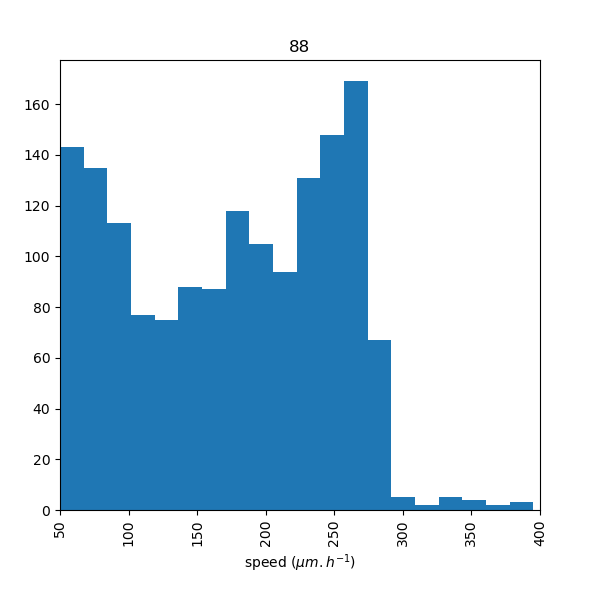

In [21]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
result.loc[(result['speed']>50) & (result['speed']<400)& (result['Plate']==88)].hist('speed','Plate', bins = 20,ax =ax)
ax.set_xlabel('speed $(\mu m.h^{-1})$')
ax.set_xlim((50,400))

In [32]:
result.loc[(result['speed']>50) & (result['speed']<350)]

,end,time,speed,time_since_emergence,Plate,t


In [10]:
select

,folder_analysis,version,Plate,PrincePos,root,strain,medium,split,Temp,CrossDate,...,Pbait,date_begin,date_end,number_timepoints,path_exp,path_global_hypha_info,path_time_hypha_info,path_time_plate_info,path_global_plate_info,date_run_analysis
0,Analysis_1636046826216022929_0_100_Version9,Version9,799,39,Carrot,A5,001P100N,Y,None,20211001,...,-,20211001_1620_Plate39,20211011_1227_Plate39,95,Analysis_1636046826216022929_0_100_Version9/ex...,Analysis_1636046826216022929_0_100_Version9/gl...,Analysis_1636046826216022929_0_100_Version9/ti...,Analysis_1636046826216022929_0_100_Version9/ti...,Analysis_1636046826216022929_0_100_Version9/gl...,"01.01.1970, 01:00:"
1,Analysis_1636107306199118080_0_100_Version9,Version9,790,23,Carrot,A5,001P100N,Y,None,20210907,...,-,20210907_1108_Plate23,20210917_1325_Plate23,96,Analysis_1636107306199118080_0_100_Version9/ex...,Analysis_1636107306199118080_0_100_Version9/gl...,Analysis_1636107306199118080_0_100_Version9/ti...,Analysis_1636107306199118080_0_100_Version9/ti...,Analysis_1636107306199118080_0_100_Version9/gl...,"01.01.1970, 01:00:"
2,Analysis_1636104897672902830_0_100_Version9,Version9,800,31,Carrot,A5,001P100N,Y,None,20210928,...,-,20210929_0942_Plate31,20211011_1408_Plate31,91,Analysis_1636104897672902830_0_100_Version9/ex...,Analysis_1636104897672902830_0_100_Version9/gl...,Analysis_1636104897672902830_0_100_Version9/ti...,Analysis_1636104897672902830_0_100_Version9/ti...,Analysis_1636104897672902830_0_100_Version9/gl...,"01.01.1970, 01:00:"
4,Analysis_1636044918401523795_0_100_Version9,Version9,80,36,Carrot,A5,001P100N,Y,None,20201127,...,-,20201128_1802_Plate36,20201206_2113_Plate36,47,Analysis_1636044918401523795_0_100_Version9/ex...,Analysis_1636044918401523795_0_100_Version9/gl...,Analysis_1636044918401523795_0_100_Version9/ti...,Analysis_1636044918401523795_0_100_Version9/ti...,Analysis_1636044918401523795_0_100_Version9/gl...,"01.01.1970, 01:00:"
5,Analysis_1636043977602188694_0_100_Version9,Version9,10,36,Carrot,A5,001P100N,Y,None,20210107,...,-,20210107_1140_Plate36,20210112_2333_Plate36,31,Analysis_1636043977602188694_0_100_Version9/ex...,Analysis_1636043977602188694_0_100_Version9/gl...,Analysis_1636043977602188694_0_100_Version9/ti...,Analysis_1636043977602188694_0_100_Version9/ti...,Analysis_1636043977602188694_0_100_Version9/gl...,"01.01.1970, 01:00:"
6,Analysis_1636044998117269036_0_100_Version9,Version9,76,38,Carrot,A5,001P100N,Y,None,20210108,...,-,20210108_1143_Plate38,20210112_2337_Plate38,25,Analysis_1636044998117269036_0_100_Version9/ex...,Analysis_1636044998117269036_0_100_Version9/gl...,Analysis_1636044998117269036_0_100_Version9/ti...,Analysis_1636044998117269036_0_100_Version9/ti...,Analysis_1636044998117269036_0_100_Version9/gl...,"01.01.1970, 01:00:"
7,Analysis_1636046622780809853_0_100_Version9,Version9,94,39,Carrot,A5,001P100N,Y,25,20201123,...,None,20201123_1253_Plate39,20201210_1156_Plate39,169,Analysis_1636046622780809853_0_100_Version9/ex...,Analysis_1636046622780809853_0_100_Version9/gl...,Analysis_1636046622780809853_0_100_Version9/ti...,Analysis_1636046622780809853_0_100_Version9/ti...,Analysis_1636046622780809853_0_100_Version9/gl...,"01.01.1970, 01:00:"
8,Analysis_1636044946127011963_0_100_Version9,Version9,88,17,Carrot,A5,001P100N,Y,None,20210915,...,-,20210915_1507_Plate17,20211006_0900_Plate17,155,Analysis_1636044946127011963_0_100_Version9/ex...,Analysis_1636044946127011963_0_100_Version9/gl...,Analysis_1636044946127011963_0_100_Version9/ti...,Analysis_1636044946127011963_0_100_Version9/ti...,Analysis_1636044946127011963_0_100_Version9/gl...,"01.01.1970, 01:00:"
9,Analysis_1636044849869238592_0_100_Version9,Version9,26,39,Carrot,A5,001P100N,Y,None,20210104,...,-,20210106_1122_Plate30,20210113_2325_Plate30,44,Analysis_1636044849869238592_0_100_Version9/ex...,Analysis_1636044849869238592_0_100_Version9/gl...,Analysis_1636044849869238592_0_100_Version9/ti...,Analysis_1636044849869238592_0_100_Version9/ti...,Analysis_1636044849869238592_0_100_Versio

/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:403: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
/home/cbisot/miniconda3/envs/amftrack/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Text(0.5, 0, 'speed')

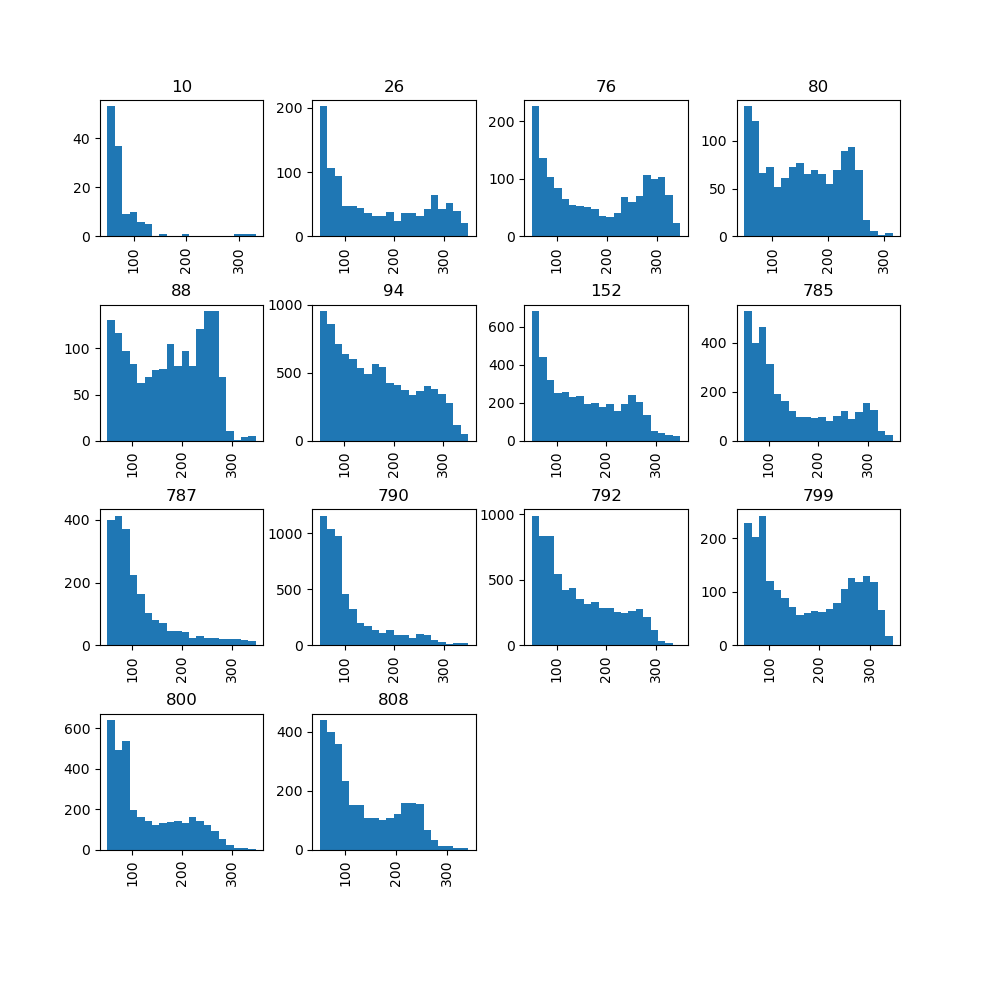

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
result.loc[(result['speed']>50) & (result['speed']<350)].hist('speed','Plate', bins = 20,ax=ax)
ax.set_xlabel('speed')

In [9]:
result.head()

,end,time,speed,time_since_emergence,Plate,t
0,0.0,2.0,182.893809,2.0,799,0
1,1.0,2.0,128.878255,2.0,799,0
4,4.0,2.0,83.043454,2.0,799,0
6,6.0,2.0,16.606078,2.0,799,0
13,13.0,2.0,4.879037,2.0,799,0


In [20]:
moving_av = real_growth_patterns.rolling(window=1000,on = x).mean()
moving_av

,end,time,speed,time_since_emergence,Plate,t
0,NaN,NaN,NaN,2.0,NaN,NaN
1,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,2.0,NaN,NaN
0,NaN,NaN,NaN,4.0,NaN,NaN
1,NaN,NaN,NaN,4.0,NaN,NaN
...,...,...,...,...,...,...
30973,14895.141,1.997633,167.375102,2.0,88.0,79.406
30984,14916.335,1.997633,167.323203,2.0,88.0,79.446
31053,14937.306,1.997633,167.260455,2.0,88.0,79.486
31079,14957.772,1.997633,167.171902,2.0,88.0,79.526


In [ ]:
result.loc[(result['speed']>50) & (result['speed']<350)]

In [26]:
result.sort_values('time_since_emergence',inplace = True,ignore_index= True)

In [37]:
hyph = choice(list(all_hyphaes))

In [48]:
all_hyphaes = set((real_growth_patterns['indiv_hypha_label']).values)
long_tracked_hypha = [hyph for hyph in all_hyphaes if len(real_growth_patterns.loc[real_growth_patterns['indiv_hypha_label']==hyph])>=20]

In [50]:
len(long_tracked_hypha)

143

Text(0, 0.5, 'hyphal tip speed $(\\mu m.h^{-1})$')

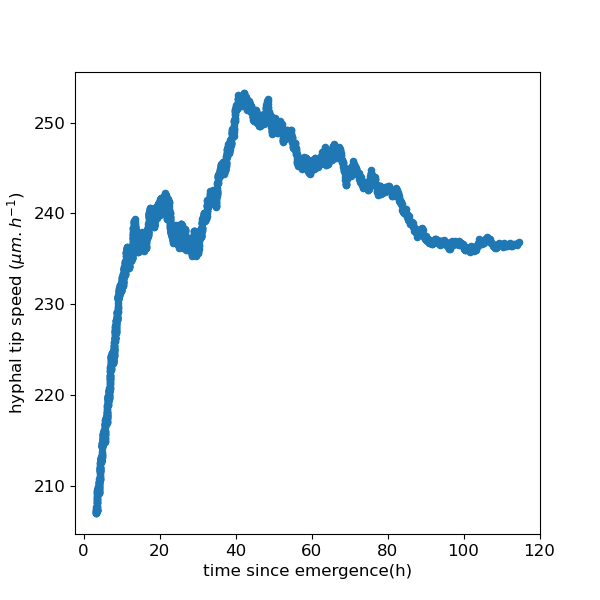

In [62]:
plt.close('all')
plt.rcParams.update({
    "font.family": "verdana",
'font.weight' : 'normal',
'font.size': 12})

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
x = 'time_since_emergence'
y = 'speed'
xlabel = 'time since emergence(h)'
ylabel = 'hyphal tip speed $(\mu m.h^{-1})$'
long_growth_patterns = real_growth_patterns.loc[real_growth_patterns['indiv_hypha_label'].isin(long_tracked_hypha)]
moving_av = long_growth_patterns.rolling(window=500).mean()
moving_av.plot(x,y,'scatter',xlabel =xlabel, ylabel = ylabel,ax =ax)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

In [34]:
x = 'time_since_emergence'
y = 'speed'
real_growth_patterns = result.loc[(result['speed']>50) & (result['speed']<350)]
moving_av = real_growth_patterns.rolling(window=1000).mean()
# moving_av.plot(x,y,'scatter')

In [ ]:
        whole_plate_info['time_since_begin'] = (whole_plate_info['datetime'] - min(whole_plate_info['datetime']))/ np.timedelta64(1, 'h')


<AxesSubplot:ylabel='Frequency'>

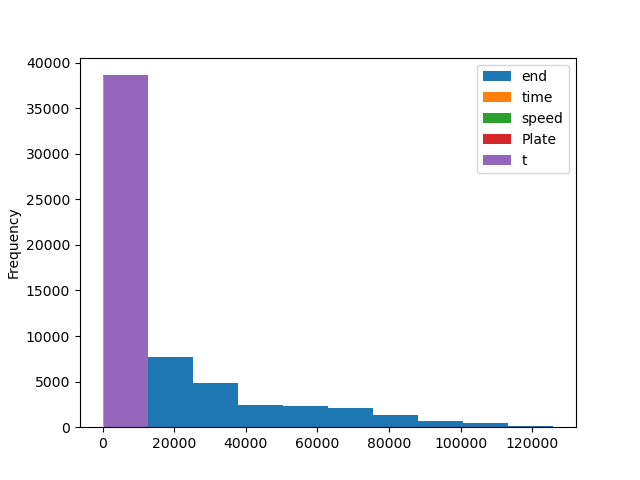

In [60]:
result.loc[result['speed']>0]['speed'].hist('Plate',bins = 100)

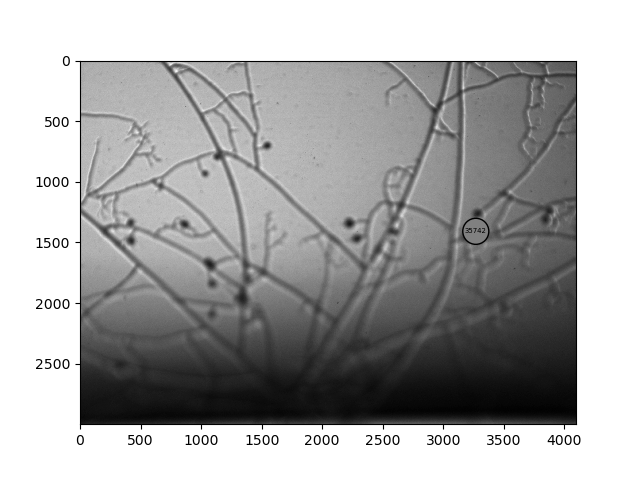

In [19]:
hypha.get_root(t).show_source_image(t,t)

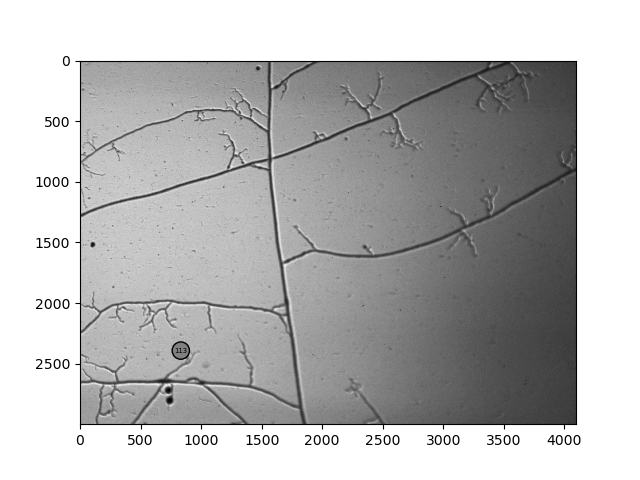

In [20]:
hypha.end.show_source_image(t,t)

In [30]:
f(hypha,t-1,tp1-1,list_args[index])

('time', 92.0)

In [28]:
dynamic_data

{}

In [22]:
from amftrack.pipeline.functions.hyphae_id_surf import get_pixel_growth_and_new_children

def get_time(hypha,t,tp1,args):
    seconds = (hypha.experiment.dates[tp1]-exp.dates[t]).total_seconds()
    return("time",seconds/3600)
def get_speed(hypha,t,tp1,args):
    try:
        pixels,nodes = get_pixel_growth_and_new_children(hypha,t,tp1)
        speed = np.sum([get_length_um(seg) for seg in pixels])/get_time(hypha,t,tp1,None)[1]
        return('speed',speed)
    except:
        print('not_connected',hypha.end.label,hypha.get_root(tp1).label)
        return('speed',None)